In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [4]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 199us/step - loss: 0.5098 - acc: 0.7804 - val_loss: 0.3825 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.3012 - acc: 0.9039 - val_loss: 0.2994 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2161 - acc: 0.9287 - val_loss: 0.3079 - val_acc: 0.8725
Epoch 4/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1728 - acc: 0.9436 - val_loss: 0.2836 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1395 - acc: 0.9552 - val_loss: 0.2854 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1119 - acc: 0.9658 - val_loss: 0.3103 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0943 - acc: 0.9721 - val_loss: 0

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

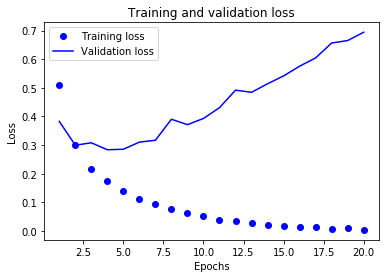

In [13]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

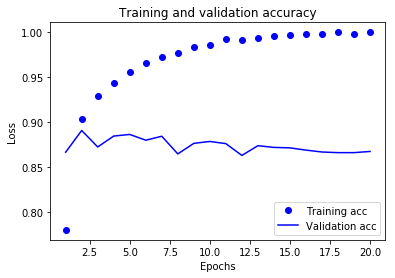

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.4968 - acc: 0.8033 - val_loss: 0.4091 - val_acc: 0.8434
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.3209 - acc: 0.9025 - val_loss: 0.3206 - val_acc: 0.8866
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2478 - acc: 0.9234 - val_loss: 0.2911 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.2042 - acc: 0.9368 - val_loss: 0.2949 - val_acc: 0.8815
Epoch 5/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1738 - acc: 0.9485 - val_loss: 0.2804 - val_acc: 0.8884
Epoch 6/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1487 - acc: 0.9565 - val_loss: 0.2841 - val_acc: 0.8845
Epoch 7/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.1326 - acc: 0.9612 - val_loss: 0.2796 - 

In [27]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.5043 - acc: 0.7809 - val_loss: 0.3727 - val_acc: 0.8752
Epoch 2/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.2940 - acc: 0.9048 - val_loss: 0.3105 - val_acc: 0.8792
Epoch 3/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.2176 - acc: 0.9271 - val_loss: 0.2810 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.1702 - acc: 0.9443 - val_loss: 0.2744 - val_acc: 0.8891
Epoch 5/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.1390 - acc: 0.9550 - val_loss: 0.2855 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1120 - acc: 0.9662 - val_loss: 0.3177 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0944 - acc: 0.9718 - val_loss: 0.3421 - 

In [29]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.5466 - acc: 0.7543 - val_loss: 0.4056 - val_acc: 0.8468
Epoch 2/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.3005 - acc: 0.8961 - val_loss: 0.2962 - val_acc: 0.8859
Epoch 3/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2090 - acc: 0.9261 - val_loss: 0.2810 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1614 - acc: 0.9444 - val_loss: 0.3380 - val_acc: 0.8683
Epoch 5/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1305 - acc: 0.9559 - val_loss: 0.3114 - val_acc: 0.8852
Epoch 6/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1066 - acc: 0.9657 - val_loss: 0.3502 - val_acc: 0.8752
Epoch 7/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.0823 - acc: 0.9743 - val_loss: 0.3541 - 

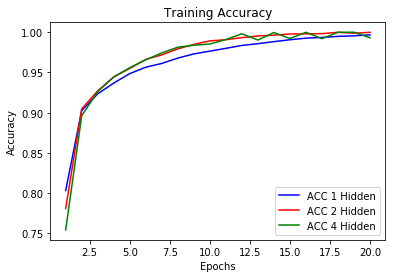

In [30]:
history_dict1 = history1.history
history_dict1.keys()
history_dict2 = history2.history
history_dict2.keys()
history_dict4 = history4.history
history_dict4.keys()


plt.clf()   # clear figure
acc_values1 = history_dict1['acc']
acc_values2 = history_dict2['acc']
acc_values4 = history_dict4['acc']


epochs = range(1, len(acc_values1) + 1)


plt.plot(epochs, acc_values1, 'b', label='ACC 1 Hidden')
plt.plot(epochs, acc_values2, 'r', label='ACC 2 Hidden')
plt.plot(epochs, acc_values4, 'g', label='ACC 4 Hidden')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()